In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_images)
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

the network architechture

In [20]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 25474 (99.51 KB)
Trainable params: 25474 (99.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Mounted at /content/drive


the compilation step

In [21]:
network.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

preparing the image data

In [23]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255.
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255.

preparing the labels

In [24]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
train_labels
test_labels=to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

training and testing

In [25]:
network.fit(train_images,train_labels,epochs=160,batch_size=512)

Epoch 1/160
118/118 [==============================] - 2s 6ms/step - loss: 2.3597 - accuracy: 0.0909
Epoch 2/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3230 - accuracy: 0.1007
Epoch 3/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3042 - accuracy: 0.1400
Epoch 4/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2933 - accuracy: 0.2447
Epoch 5/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2858 - accuracy: 0.2406
Epoch 6/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2800 - accuracy: 0.2236
Epoch 7/160
118/118 [==============================] - 1s 4ms/step - loss: 2.2748 - accuracy: 0.2319
Epoch 8/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2698 - accuracy: 0.2489
Epoch 9/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2647 - accuracy: 0.2620
Epoch 10/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2595 - accura

In [26]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('Test Accuracy: {:.5f}'.format(test_acc))
test_acc

313/313 [==============================] - 2s 3ms/step - loss: 0.5711 - accuracy: 0.8671
Test Accuracy: 0.86710


0.8671000003814697

Epoch 1/5
79/79 [==============================] - 2s 19ms/step - loss: 0.5833 - accuracy: 0.8651 - val_loss: 0.5728 - val_accuracy: 0.8662
Epoch 2/5
79/79 [==============================] - 2s 20ms/step - loss: 0.5813 - accuracy: 0.8653 - val_loss: 0.5709 - val_accuracy: 0.8665
Epoch 3/5
79/79 [==============================] - 2s 20ms/step - loss: 0.5792 - accuracy: 0.8658 - val_loss: 0.5690 - val_accuracy: 0.8667
Epoch 4/5
79/79 [==============================] - 2s 29ms/step - loss: 0.5772 - accuracy: 0.8664 - val_loss: 0.5670 - val_accuracy: 0.8671
Epoch 5/5
79/79 [==============================] - 1s 17ms/step - loss: 0.5751 - accuracy: 0.8668 - val_loss: 0.5651 - val_accuracy: 0.8671
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


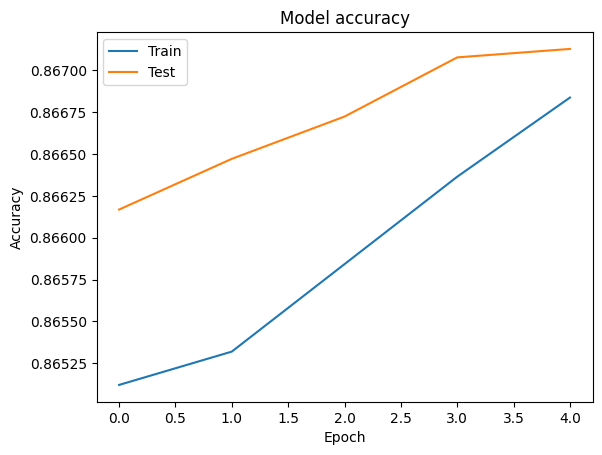

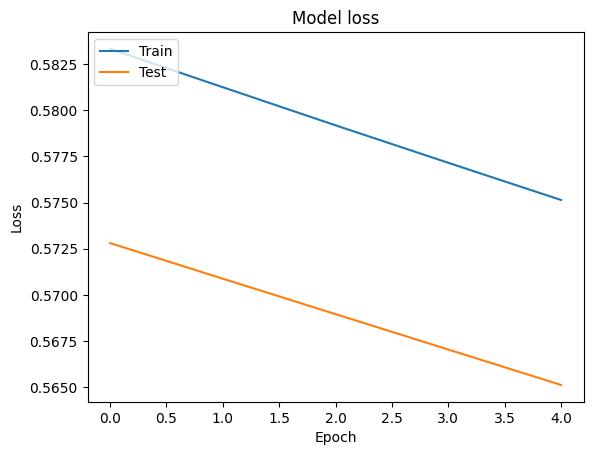

In [27]:
from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
